In [2]:
import tensorflow as tf
import numpy as np                                
import matplotlib.pyplot as plt
import keras as k
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
import h5py
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical


In [15]:
pip install modAL-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 1.8 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [39]:

# Load MNIST dataset
mnist = tf.keras.datasets.mnist

# Split the dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Print the shapes of training and testing sets
print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing set shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)


Training set shape: (60000, 28, 28)
Training labels shape: (60000, 10)
Testing set shape: (10000, 28, 28)
Testing labels shape: (10000, 10)


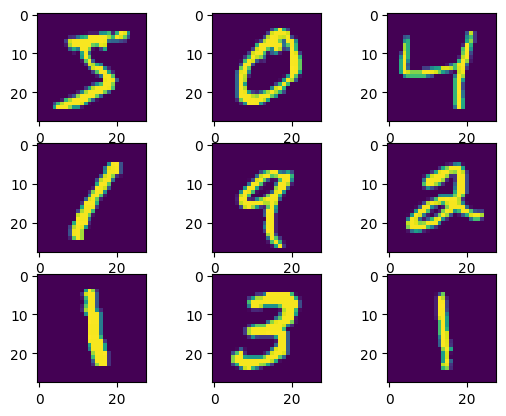

In [10]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()

In [40]:

#the model has 6 convolutional layers, 1 flatten layer, and 2 dense layers, making it a total of 9 layers.
# Smaller than Vgg-16

reg=None
num_filters=32
ac='relu'
adm = Adam(learning_rate=0.001, decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=adm
drop_dense=0.5
drop_conv=0

# Define model
model = Sequential()

# Convolutional layers
model.add(Conv2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg, input_shape=(28, 28, 1), padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(drop_conv))

model.add(Conv2D(2 * num_filters, (3, 3), activation=ac, kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2 * num_filters, (3, 3), activation=ac, kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(drop_conv))

model.add(Conv2D(4 * num_filters, (3, 3), activation=ac, kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4 * num_filters, (3, 3), activation=ac, kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(drop_conv))

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(512, activation=ac, kernel_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(10, activation='softmax'))  # 10 classes for MNIST dataset

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [41]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 885,738 (3.38 MB)

 Trainable params: 883,818 (3.37 MB)

 Non-trainable params: 1,920 (7.50 KB)

# > **Uncertainty Sampling (Least Confidence)**

In [16]:
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the initial labeled dataset into labeled and unlabeled subsets
x_labeled, x_unlabeled, y_labeled, y_unlabeled = train_test_split(
    x_train, y_train, test_size=0.95, random_state=42)


# Define the custom predict_proba function
def predict_proba_custom(model, X):
    raw_predictions = model.predict(X)
    class_probabilities = np.exp(raw_predictions) / np.sum(np.exp(raw_predictions), axis=1, keepdims=True)
    return class_probabilities

# Assign the custom predict_proba function to the estimator
model.predict_proba = lambda X: predict_proba_custom(model, X)

# Initialize the ActiveLearner
learner = ActiveLearner(
    estimator=model, 
    X_training=x_labeled, 
    y_training=y_labeled, 
    query_strategy=uncertainty_sampling
)

n_queries = 10

n_samples_per_iteration = 4000  


# Training loop
for i in range(n_queries):
    
    query_idx, query_sample = learner.query(x_unlabeled, n_instances=n_samples_per_iteration)
    
    queried_labels = y_unlabeled[query_idx]
    
    
    # Label the queried samples and update the labeled dataset
    x_labeled = np.concatenate([x_labeled, query_sample])
    y_labeled = np.concatenate([y_labeled, queried_labels])
    x_unlabeled = np.delete(x_unlabeled, query_idx, axis=0)
    y_unlabeled = np.delete(y_unlabeled, query_idx, axis=0)
    
    print("X_labeled " , x_labeled.shape)
    print("y_labeled " , y_labeled.shape)
    print("learner x_train " , learner.X_training.shape)
    print("learner y_train " , learner.y_training.shape)

    
    
    # Update the learner with the newly labeled data
    learner.teach(query_sample, queried_labels)
    
    # Evaluate the model's performance on the training set
    train_pred = learner.predict(x_train)
    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))
    train_precision = precision_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1), average='macro')
    train_recall = recall_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1), average='macro')
    train_f1 = f1_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1), average='macro')
    
    
    # Evaluate the model's performance on the unlabeled set
    unlabeled_pred = learner.predict(x_unlabeled)
    unlabeled_accuracy = accuracy_score(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1))
    unlabeled_precision = precision_score(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1), average='macro')
    unlabeled_recall = recall_score(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1), average='macro')
    unlabeled_f1 = f1_score(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1), average='macro')
    
    
     # Evaluate the model's performance on the labeled set
    labeled_pred = learner.predict(x_labeled)
    labeled_accuracy = accuracy_score(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1))
    labeled_precision = precision_score(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1), average='macro')
    labeled_recall = recall_score(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1), average='macro')
    labeled_f1 = f1_score(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1), average='macro')
    
    
    
    # Evaluate the model's performance on the test set
    test_pred = learner.predict(x_test)
    test_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))
    test_precision = precision_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), average='macro')
    test_recall = recall_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), average='macro')
    test_f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), average='macro')
    
    print(f"Iteration {i+1} - Train Accuracy: {train_accuracy:.4f}, Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}")
    print(f"Iteration {i+1} - Test Accuracy: {test_accuracy:.4f}, Test Precision: {test_precision:.4f}, Test Recall: {test_recall:.4f}, Test F1: {test_f1:.4f}")
    print(f"Iteration {i+1} - Labeled Accuracy: {labeled_accuracy:.4f}, Labeled Precision: {labeled_precision:.4f}, Labeled Recall: {labeled_recall:.4f}, Labeled F1: {labeled_f1:.4f}")
    print(f"Iteration {i+1} - unlabeled Accuracy: {unlabeled_accuracy:.4f}, unlabeled Precision: {unlabeled_precision:.4f}, unlabeled Recall: {unlabeled_recall:.4f}, unlabeled F1: {unlabeled_f1:.4f}")

24/94 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4986 - loss: 1.8310

I0000 00:00:1714155059.043905     128 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714155059.068780     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - accuracy: 0.7243 - loss: 0.9610


W0000 00:00:1714155066.024199     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


  86/1782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step 

W0000 00:00:1714155067.218286     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1782/1782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


W0000 00:00:1714155071.822405     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


X_labeled  (7000, 28, 28)
y_labeled  (7000, 10)
learner x_train  (3000, 28, 28)
learner y_train  (3000, 10)
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9491 - loss: 0.1619
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1657/1657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
 30/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


W0000 00:00:1714155084.118543     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Iteration 1 - Train Accuracy: 0.1124, Train Precision: 0.0112, Train Recall: 0.1000, Train F1: 0.0202
Iteration 1 - Test Accuracy: 0.1135, Test Precision: 0.0114, Test Recall: 0.1000, Test F1: 0.0204
Iteration 1 - Labeled Accuracy: 0.0491, Labeled Precision: 0.0049, Labeled Recall: 0.1000, Labeled F1: 0.0094
Iteration 1 - unlabeled Accuracy: 0.1207, unlabeled Precision: 0.0121, unlabeled Recall: 0.1000, unlabeled F1: 0.0215


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1657/1657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
X_labeled  (11000, 28, 28)
y_labeled  (11000, 10)
learner x_train  (7000, 28, 28)
learner y_train  (7000, 10)
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9815 - loss: 0.0574
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Iteration 2 - Train Accuracy: 0.9614, Train Precision: 0.9628, Train Recall: 0.9608, Train F1: 0.9613
Iteration 2 - Test Accuracy: 0.9666, Test Precision: 0.9674, Test Recall: 0.9661, Test F1: 0.9664
Iteration 2 - Labeled Accuracy: 0.9885, Labeled Precision: 0.9817, Labeled Recall: 0.9859, Labeled F1: 0.9837
Iteration 2 - unlabeled Accuracy: 0.9553, unlabeled Precision: 0.9582, unlabeled Recall: 0.9523, unlabeled F1: 0.9545
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
X_labeled  (15000, 28, 28)
y_labeled  (15000, 10)
learner x_train  (11000, 28, 28)
learner y_train  (11000, 10)
469/469 ━━━━━━━━━━━━━

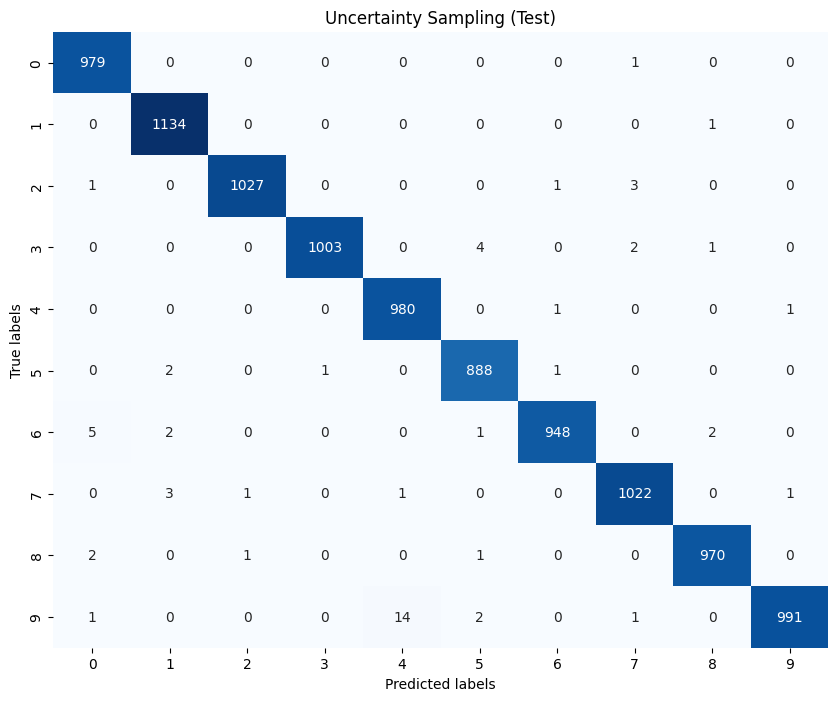

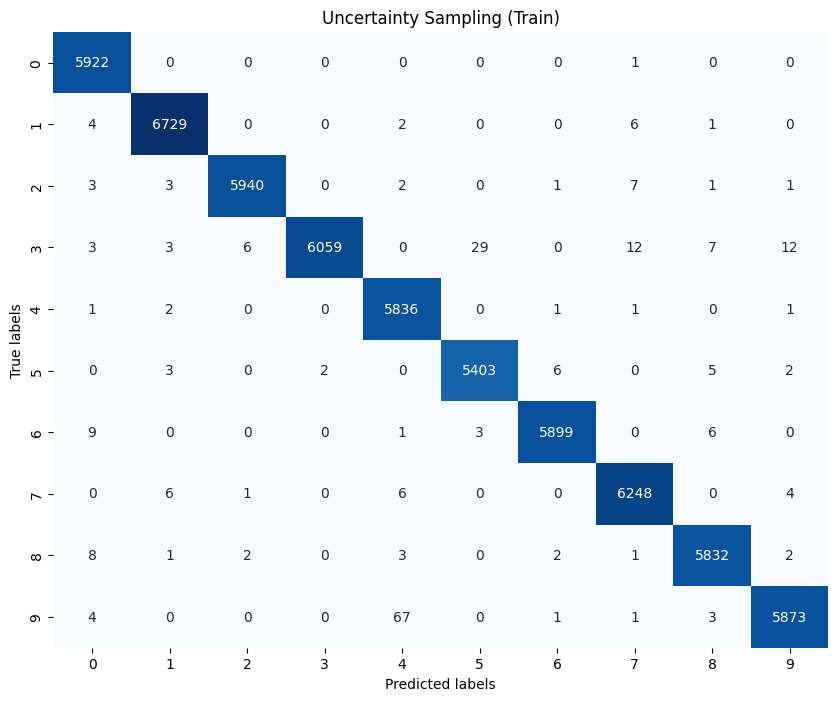

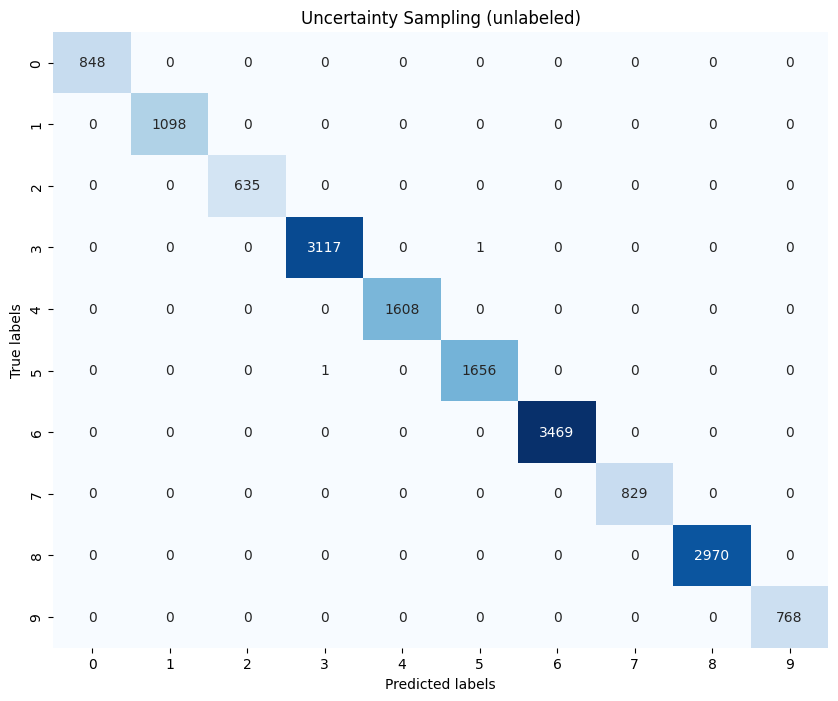

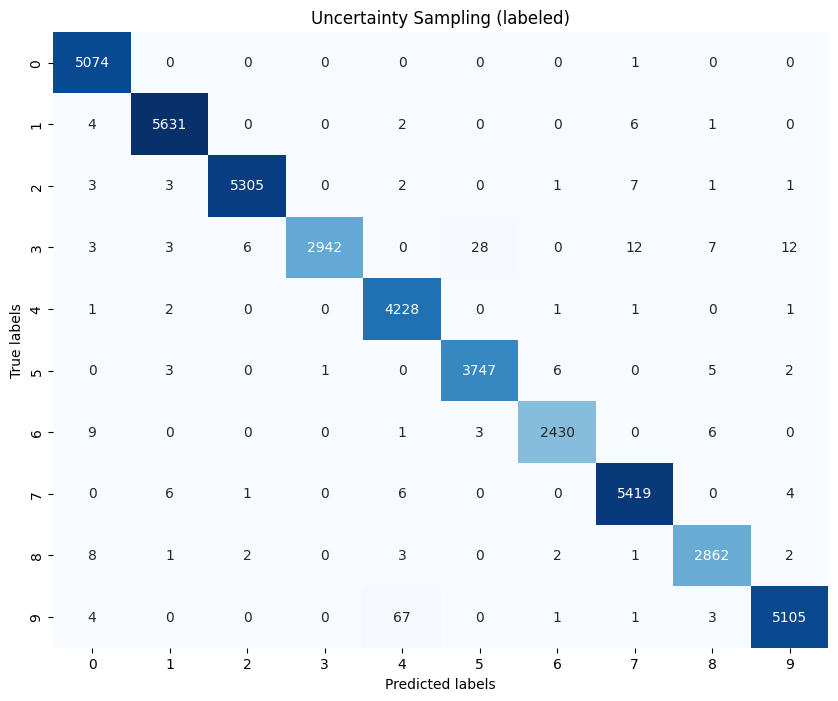

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Uncertainty Sampling (Test)')
plt.show()


conf_matrix = confusion_matrix(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Uncertainty Sampling (Train)')
plt.show()


conf_matrix = confusion_matrix(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Uncertainty Sampling (unlabeled)')
plt.show()


conf_matrix = confusion_matrix(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Uncertainty Sampling (labeled)')
plt.show()




In [18]:
from sklearn.metrics import classification_report

report1 = classification_report(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))
report2 = classification_report(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))
report3 = classification_report(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1))
report4 = classification_report(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1))

print(report1)
print(report2)
print(report3)
print(report4)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      0.99      1.00      1010
           4       0.98      1.00      0.99       982
           5       0.99      1.00      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      1.00      1.00       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00 

# > **Random Sampling**

In [22]:
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the initial labeled dataset into labeled and unlabeled subsets
x_labeled, x_unlabeled, y_labeled, y_unlabeled = train_test_split(
    x_train, y_train, test_size=0.95, random_state=42)


def random_sampling(classifier, X_pool,n_instances):
    n_samples = len(X_pool)
    query_idx = np.random.choice(range(n_samples), size=n_instances, replace=False)
    return query_idx, X_pool[query_idx]


learner = ActiveLearner(
    estimator=model, 
    X_training=x_labeled, 
    y_training=y_labeled, 
    query_strategy=random_sampling
)

n_queries = 10

n_samples_per_iteration = 4000  

# Training loop
for i in range(n_queries):

    query_idx, query_sample = learner.query(x_unlabeled, n_instances=n_samples_per_iteration)
    
    queried_labels = y_unlabeled[query_idx]
    
    # Label the queried samples and update the labeled dataset
    x_labeled = np.concatenate([x_labeled, query_sample])
    y_labeled = np.concatenate([y_labeled, queried_labels])
    x_unlabeled = np.delete(x_unlabeled, query_idx, axis=0)
    y_unlabeled = np.delete(y_unlabeled, query_idx, axis=0)
    
    print("X_labeled " , x_labeled.shape)
    print("y_labeled " , y_labeled.shape)
    print("learner x_train " , learner.X_training.shape)
    print("learner y_train " , learner.y_training.shape)

    
    
    learner.teach(query_sample, queried_labels)
    
    # Evaluate the model's performance on the training set
    train_pred = learner.predict(x_train)
    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))
    train_precision = precision_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1), average='macro')
    train_recall = recall_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1), average='macro')
    train_f1 = f1_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1), average='macro')
    
    
    # Evaluate the model's performance on the unlabeled set
    unlabeled_pred = learner.predict(x_unlabeled)
    unlabeled_accuracy = accuracy_score(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1))
    unlabeled_precision = precision_score(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1), average='macro')
    unlabeled_recall = recall_score(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1), average='macro')
    unlabeled_f1 = f1_score(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1), average='macro')
    
    
     # Evaluate the model's performance on the labeled set
    labeled_pred = learner.predict(x_labeled)
    labeled_accuracy = accuracy_score(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1))
    labeled_precision = precision_score(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1), average='macro')
    labeled_recall = recall_score(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1), average='macro')
    labeled_f1 = f1_score(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1), average='macro')
    
    
    
    
    # Evaluate the model's performance on the test set
    test_pred = learner.predict(x_test)
    test_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))
    test_precision = precision_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), average='macro')
    test_recall = recall_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), average='macro')
    test_f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), average='macro')
    
    print(f"Iteration {i+1} - Train Accuracy: {train_accuracy:.4f}, Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}")
    print(f"Iteration {i+1} - Test Accuracy: {test_accuracy:.4f}, Test Precision: {test_precision:.4f}, Test Recall: {test_recall:.4f}, Test F1: {test_f1:.4f}")
    print(f"Iteration {i+1} - Labeled Accuracy: {labeled_accuracy:.4f}, Labeled Precision: {labeled_precision:.4f}, Labeled Recall: {labeled_recall:.4f}, Labeled F1: {labeled_f1:.4f}")
    print(f"Iteration {i+1} - unlabeled Accuracy: {unlabeled_accuracy:.4f}, unlabeled Precision: {unlabeled_precision:.4f}, unlabeled Recall: {unlabeled_recall:.4f}, unlabeled F1: {unlabeled_f1:.4f}")

24/94 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4817 - loss: 1.6813

W0000 00:00:1714156302.844679     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 58ms/step - accuracy: 0.7218 - loss: 0.8879


W0000 00:00:1714156308.208072     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


X_labeled  (7000, 28, 28)
y_labeled  (7000, 10)
learner x_train  (3000, 28, 28)
learner y_train  (3000, 10)
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9537 - loss: 0.1575
  84/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step 

W0000 00:00:1714156310.718265     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1657/1657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


W0000 00:00:1714156318.541487     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 58/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


W0000 00:00:1714156320.072643     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Iteration 1 - Train Accuracy: 0.1291, Train Precision: 0.1112, Train Recall: 0.1170, Train F1: 0.0495
Iteration 1 - Test Accuracy: 0.1321, Test Precision: 0.1116, Test Recall: 0.1190, Test F1: 0.0526
Iteration 1 - Labeled Accuracy: 0.1361, Labeled Precision: 0.1120, Labeled Recall: 0.1179, Labeled F1: 0.0519
Iteration 1 - unlabeled Accuracy: 0.1282, unlabeled Precision: 0.1111, unlabeled Recall: 0.1169, unlabeled F1: 0.0492


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


X_labeled  (11000, 28, 28)
y_labeled  (11000, 10)
learner x_train  (7000, 28, 28)
learner y_train  (7000, 10)
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9719 - loss: 0.0905
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Iteration 2 - Train Accuracy: 0.9650, Train Precision: 0.9672, Train Recall: 0.9647, Train F1: 0.9651
Iteration 2 - Test Accuracy: 0.9674, Test Precision: 0.9696, Test Recall: 0.9671, Test F1: 0.9675
Iteration 2 - Labeled Accuracy: 0.9727, Labeled Precision: 0.9744, Labeled Recall: 0.9726, Labeled F1: 0.9728
Iteration 2 - unlabeled Accuracy: 0.9633, unlabeled Precision: 0.9656, unlabeled Recall: 0.9629, unlabeled F1: 0.9634
X_labeled  (15000, 28, 28)
y_labeled  (15000, 10)
learner x_train  (11000, 28, 28)
learner y_train  (11000, 10)
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9803 - loss: 0.0629
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3

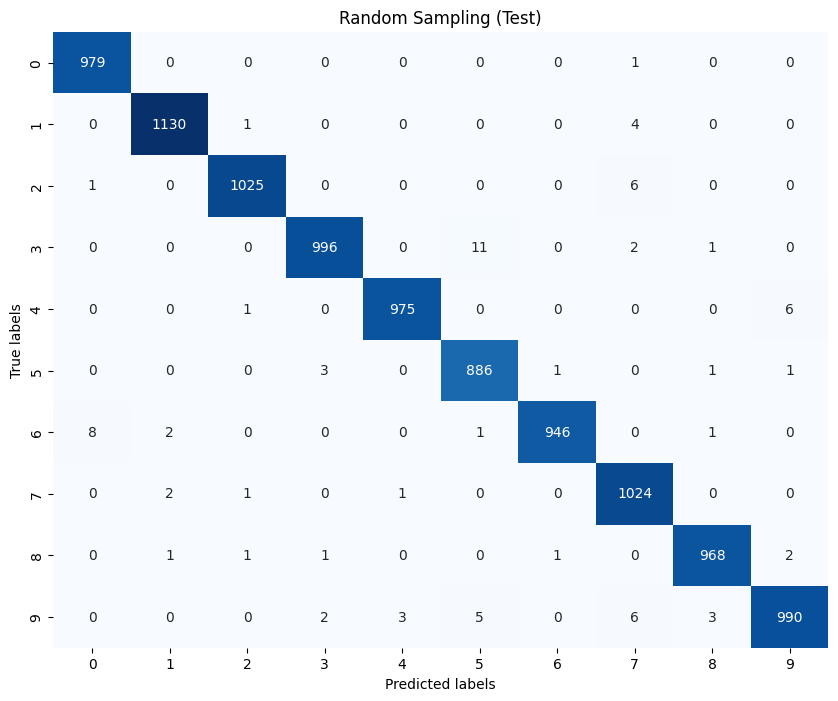

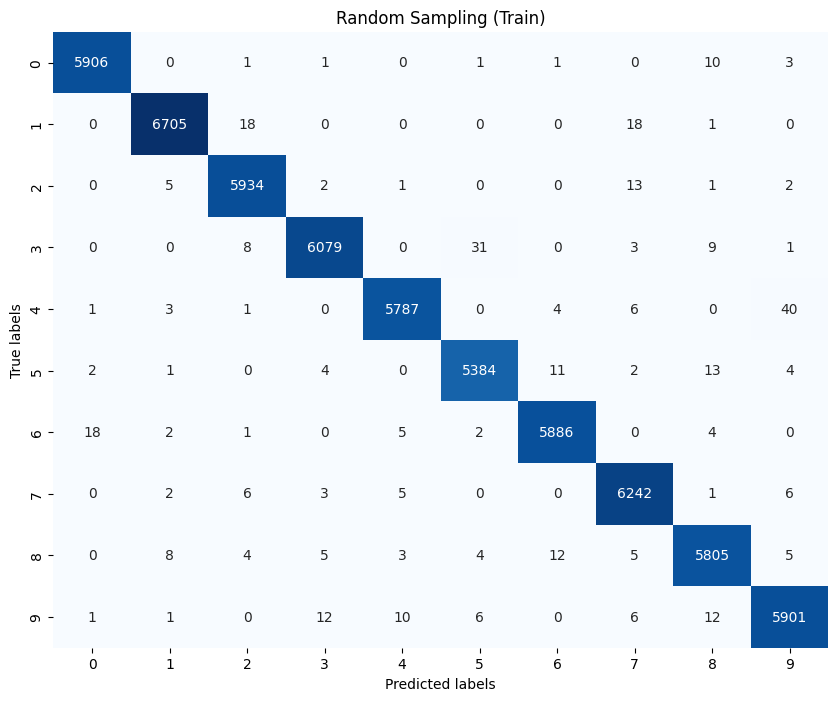

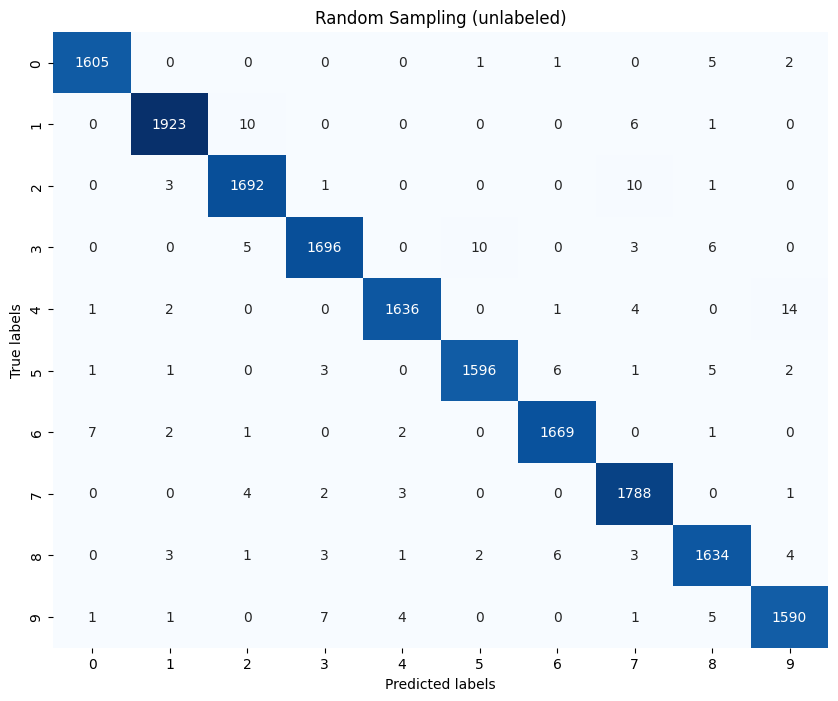

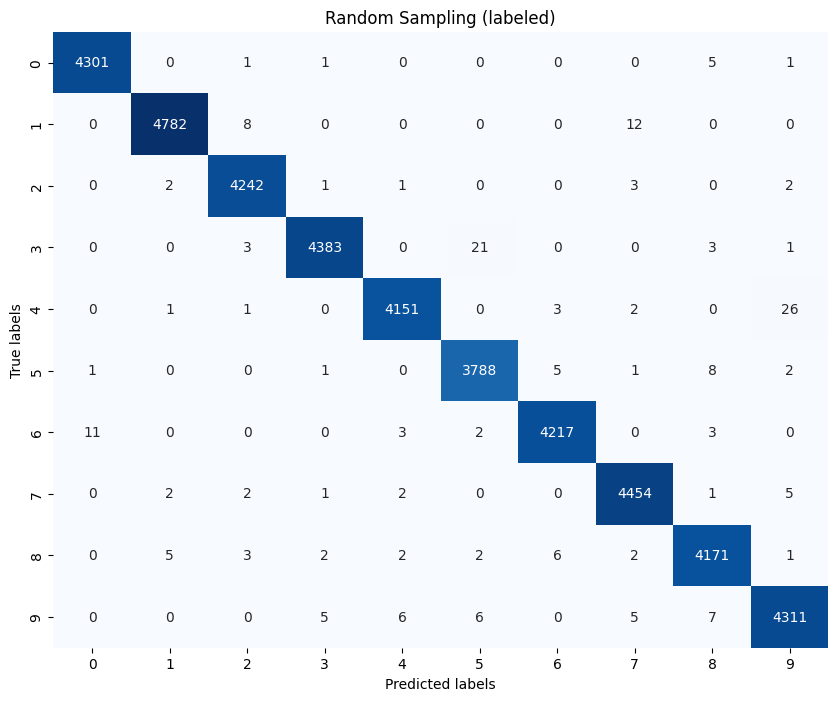

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Random Sampling (Test)')
plt.show()


conf_matrix = confusion_matrix(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Random Sampling (Train)')
plt.show()


conf_matrix = confusion_matrix(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Random Sampling (unlabeled)')
plt.show()


conf_matrix = confusion_matrix(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Random Sampling (labeled)')
plt.show()




In [24]:
from sklearn.metrics import classification_report

report1 = classification_report(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))
report2 = classification_report(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))
report3 = classification_report(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1))
report4 = classification_report(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1))

print(report1)
print(report2)
print(report3)
print(report4)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      0.99      1.00      6742
           2       0.99      1.00      0.99      5958
           3       1.00 

# > **Margin Sampling**

In [30]:
from modAL.models import ActiveLearner
from modAL.uncertainty import margin_sampling
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the initial labeled dataset into labeled and unlabeled subsets
x_labeled, x_unlabeled, y_labeled, y_unlabeled = train_test_split(
    x_train, y_train, test_size=0.95, random_state=42)


# Define the custom predict_proba function
def predict_proba_custom(model, X):
    raw_predictions = model.predict(X)
    class_probabilities = np.exp(raw_predictions) / np.sum(np.exp(raw_predictions), axis=1, keepdims=True)
    return class_probabilities

# Assign the custom predict_proba function to the estimator
model.predict_proba = lambda X: predict_proba_custom(model, X)

learner = ActiveLearner(
    estimator=model, 
    X_training=x_labeled, 
    y_training=y_labeled, 
    query_strategy=margin_sampling
)

n_queries = 10

n_samples_per_iteration = 4000 


# Training loop
for i in range(n_queries):

    query_idx, query_sample = learner.query(x_unlabeled, n_instances=n_samples_per_iteration)
    
    queried_labels = y_unlabeled[query_idx]
    
    x_labeled = np.concatenate([x_labeled, query_sample])
    y_labeled = np.concatenate([y_labeled, queried_labels])
    x_unlabeled = np.delete(x_unlabeled, query_idx, axis=0)
    y_unlabeled = np.delete(y_unlabeled, query_idx, axis=0)
    
    print("X_labeled " , x_labeled.shape)
    print("y_labeled " , y_labeled.shape)
    print("learner x_train " , learner.X_training.shape)
    print("learner y_train " , learner.y_training.shape)

    
    
    learner.teach(query_sample, queried_labels)
    
    # Evaluate the model's performance on the training set
    train_pred = learner.predict(x_train)
    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))
    train_precision = precision_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1), average='macro')
    train_recall = recall_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1), average='macro')
    train_f1 = f1_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1), average='macro')
    
    
    # Evaluate the model's performance on the unlabeled set
    unlabeled_pred = learner.predict(x_unlabeled)
    unlabeled_accuracy = accuracy_score(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1))
    unlabeled_precision = precision_score(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1), average='macro')
    unlabeled_recall = recall_score(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1), average='macro')
    unlabeled_f1 = f1_score(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1), average='macro')
    
    
     # Evaluate the model's performance on the labeled set
    labeled_pred = learner.predict(x_labeled)
    labeled_accuracy = accuracy_score(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1))
    labeled_precision = precision_score(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1), average='macro')
    labeled_recall = recall_score(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1), average='macro')
    labeled_f1 = f1_score(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1), average='macro')
    
    
    
    # Evaluate the model's performance on the test set
    test_pred = learner.predict(x_test)
    test_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))
    test_precision = precision_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), average='macro')
    test_recall = recall_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), average='macro')
    test_f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), average='macro')
    
    print(f"Iteration {i+1} - Train Accuracy: {train_accuracy:.4f}, Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}")
    print(f"Iteration {i+1} - Test Accuracy: {test_accuracy:.4f}, Test Precision: {test_precision:.4f}, Test Recall: {test_recall:.4f}, Test F1: {test_f1:.4f}")
    print(f"Iteration {i+1} - Labeled Accuracy: {labeled_accuracy:.4f}, Labeled Precision: {labeled_precision:.4f}, Labeled Recall: {labeled_recall:.4f}, Labeled F1: {labeled_f1:.4f}")
    print(f"Iteration {i+1} - unlabeled Accuracy: {unlabeled_accuracy:.4f}, unlabeled Precision: {unlabeled_precision:.4f}, unlabeled Recall: {unlabeled_recall:.4f}, unlabeled F1: {unlabeled_f1:.4f}")

24/94 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4879 - loss: 1.7356

W0000 00:00:1714156812.281443     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - accuracy: 0.7202 - loss: 0.9351


W0000 00:00:1714156817.208061     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


  88/1782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step 

W0000 00:00:1714156818.307125     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1782/1782 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


W0000 00:00:1714156822.053677     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


X_labeled  (7000, 28, 28)
y_labeled  (7000, 10)
learner x_train  (3000, 28, 28)
learner y_train  (3000, 10)
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9578 - loss: 0.1352
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1657/1657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
 28/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


W0000 00:00:1714156833.758631     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Iteration 1 - Train Accuracy: 0.4540, Train Precision: 0.7300, Train Recall: 0.4525, Train F1: 0.3965
Iteration 1 - Test Accuracy: 0.4485, Test Precision: 0.7299, Test Recall: 0.4482, Test F1: 0.3898
Iteration 1 - Labeled Accuracy: 0.6987, Labeled Precision: 0.7550, Labeled Recall: 0.4732, Labeled F1: 0.4268
Iteration 1 - unlabeled Accuracy: 0.4216, unlabeled Precision: 0.7208, unlabeled Recall: 0.4472, unlabeled F1: 0.3875


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1657/1657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
X_labeled  (11000, 28, 28)
y_labeled  (11000, 10)
learner x_train  (7000, 28, 28)
learner y_train  (7000, 10)
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9703 - loss: 0.0941
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Iteration 2 - Train Accuracy: 0.9688, Train Precision: 0.9694, Train Recall: 0.9686, Train F1: 0.9684
Iteration 2 - Test Accuracy: 0.9691, Test Precision: 0.9695, Test Recall: 0.9689, Test F1: 0.9686
Iteration 2 - Labeled Accuracy: 0.9803, Labeled Precision: 0.9836, Labeled Recall: 0.9777, Labeled F1: 0.9803
Iteration 2 - unlabeled Accuracy: 0.9662, unlabeled Precision: 0.9659, unlabeled Recall: 0.9656, unlabeled F1: 0.9650
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
X_labeled  (15000, 28, 28)
y_labeled  (15000, 10)
learner x_train  (11000, 28, 28)
learner y_train  (11000, 10)
469/469 ━━━━━━━━━━━━━

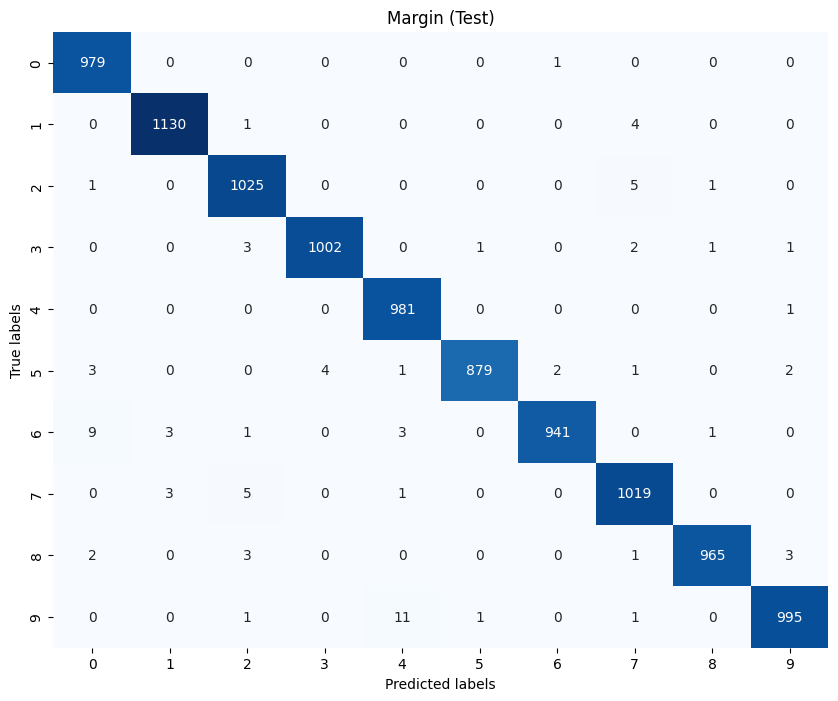

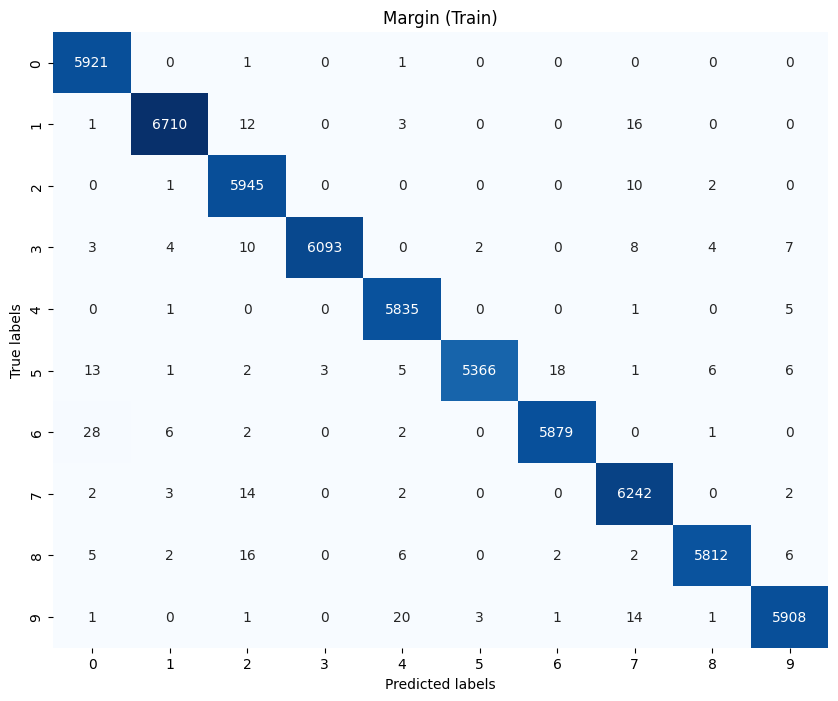

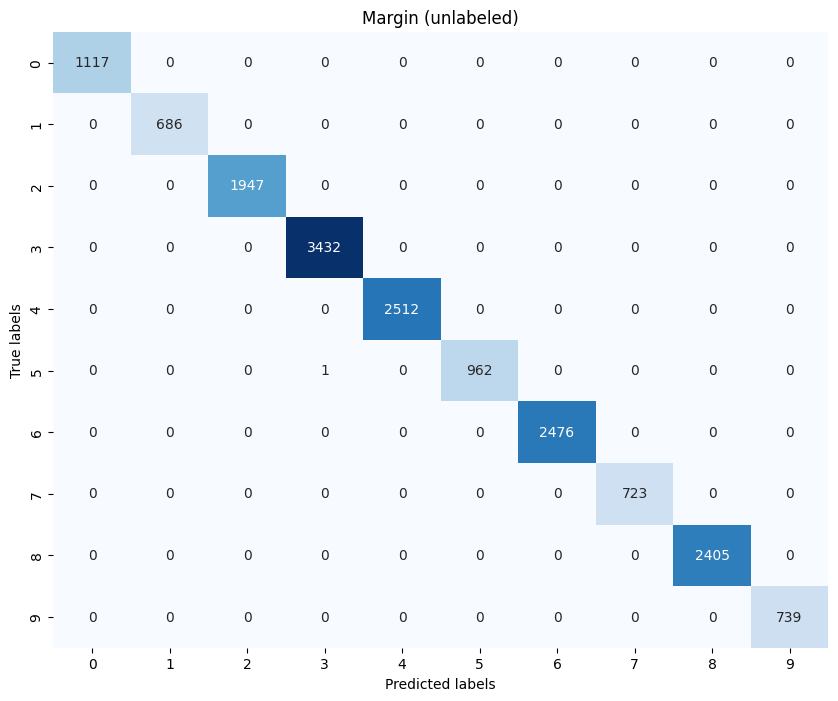

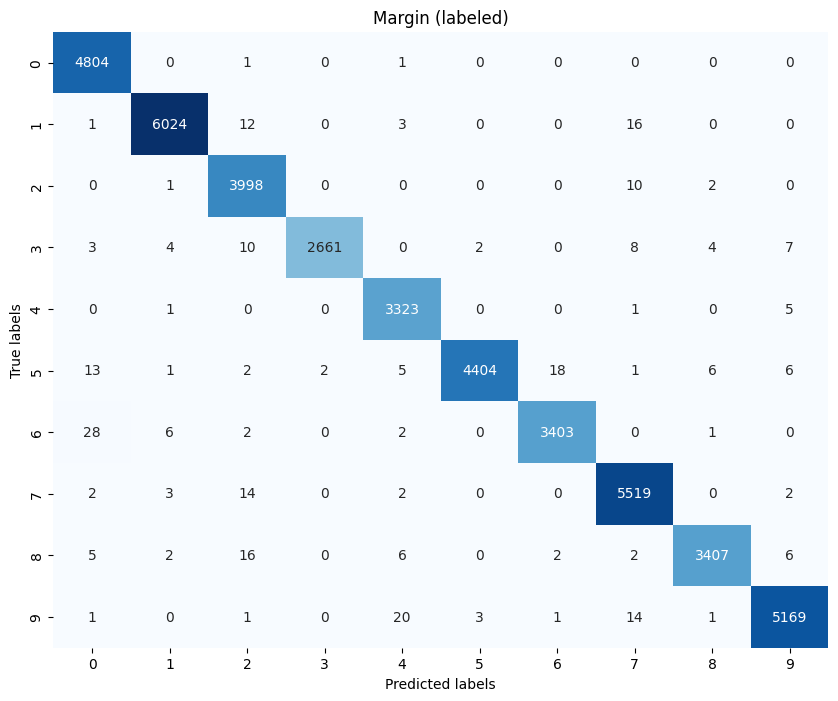

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Margin (Test)')
plt.show()


conf_matrix = confusion_matrix(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Margin (Train)')
plt.show()


conf_matrix = confusion_matrix(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Margin (unlabeled)')
plt.show()


conf_matrix = confusion_matrix(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Margin (labeled)')
plt.show()




In [32]:
from sklearn.metrics import classification_report

report1 = classification_report(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))
report2 = classification_report(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))
report3 = classification_report(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1))
report4 = classification_report(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1))

print(report1)
print(report2)
print(report3)
print(report4)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       0.99      1.00      0.99      5958
           3       1.00 

# > **Entropy Sampling**

In [36]:
from modAL.models import ActiveLearner
from modAL.uncertainty import entropy_sampling
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the initial labeled dataset into labeled and unlabeled subsets
x_labeled, x_unlabeled, y_labeled, y_unlabeled = train_test_split(
    x_train, y_train, test_size=0.95, random_state=42)



# Define the custom predict_proba function
def predict_proba_custom(model, X):
    raw_predictions = model.predict(X)
    class_probabilities = np.exp(raw_predictions) / np.sum(np.exp(raw_predictions), axis=1, keepdims=True)
    return class_probabilities

# Assign the custom predict_proba function to the estimator
model.predict_proba = lambda X: predict_proba_custom(model, X)


learner = ActiveLearner(
    estimator=model, 
    X_training=x_labeled, 
    y_training=y_labeled, 
    query_strategy=entropy_sampling
)

n_queries = 10

n_samples_per_iteration = 4000  


# Training loop
for i in range(n_queries):

    query_idx, query_sample = learner.query(x_unlabeled, n_instances=n_samples_per_iteration)
    
    queried_labels = y_unlabeled[query_idx]
    
    # Label the queried samples and update the labeled dataset
    x_labeled = np.concatenate([x_labeled, query_sample])
    y_labeled = np.concatenate([y_labeled, queried_labels])
    x_unlabeled = np.delete(x_unlabeled, query_idx, axis=0)
    y_unlabeled = np.delete(y_unlabeled, query_idx, axis=0)
    
    print("X_labeled " , x_labeled.shape)
    print("y_labeled " , y_labeled.shape)
    print("learner x_train " , learner.X_training.shape)
    print("learner y_train " , learner.y_training.shape)

    
    
    learner.teach(query_sample, queried_labels)
    
    # Evaluate the model's performance on the training set
    train_pred = learner.predict(x_train)
    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))
    train_precision = precision_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1), average='macro')
    train_recall = recall_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1), average='macro')
    train_f1 = f1_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1), average='macro')
    
    
    # Evaluate the model's performance on the unlabeled set
    unlabeled_pred = learner.predict(x_unlabeled)
    unlabeled_accuracy = accuracy_score(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1))
    unlabeled_precision = precision_score(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1), average='macro')
    unlabeled_recall = recall_score(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1), average='macro')
    unlabeled_f1 = f1_score(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1), average='macro')
    
    
     # Evaluate the model's performance on the labeled set
    labeled_pred = learner.predict(x_labeled)
    labeled_accuracy = accuracy_score(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1))
    labeled_precision = precision_score(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1), average='macro')
    labeled_recall = recall_score(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1), average='macro')
    labeled_f1 = f1_score(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1), average='macro')
    
    
    
    # Evaluate the model's performance on the test set
    test_pred = learner.predict(x_test)
    test_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))
    test_precision = precision_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), average='macro')
    test_recall = recall_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), average='macro')
    test_f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), average='macro')
    
    print(f"Iteration {i+1} - Train Accuracy: {train_accuracy:.4f}, Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}")
    print(f"Iteration {i+1} - Test Accuracy: {test_accuracy:.4f}, Test Precision: {test_precision:.4f}, Test Recall: {test_recall:.4f}, Test F1: {test_f1:.4f}")
    print(f"Iteration {i+1} - Labeled Accuracy: {labeled_accuracy:.4f}, Labeled Precision: {labeled_precision:.4f}, Labeled Recall: {labeled_recall:.4f}, Labeled F1: {labeled_f1:.4f}")
    print(f"Iteration {i+1} - unlabeled Accuracy: {unlabeled_accuracy:.4f}, unlabeled Precision: {unlabeled_precision:.4f}, unlabeled Recall: {unlabeled_recall:.4f}, unlabeled F1: {unlabeled_f1:.4f}")

24/94 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4510 - loss: 1.9676

W0000 00:00:1714157434.591415     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.7079 - loss: 1.0143


W0000 00:00:1714157439.526422     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


  86/1782 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step 

W0000 00:00:1714157440.615805     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1782/1782 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


W0000 00:00:1714157444.227362     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


X_labeled  (7000, 28, 28)
y_labeled  (7000, 10)
learner x_train  (3000, 28, 28)
learner y_train  (3000, 10)
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9506 - loss: 0.1639
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1657/1657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
 29/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


W0000 00:00:1714157455.801956     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Iteration 1 - Train Accuracy: 0.1124, Train Precision: 0.0112, Train Recall: 0.1000, Train F1: 0.0202
Iteration 1 - Test Accuracy: 0.1135, Test Precision: 0.0114, Test Recall: 0.1000, Test F1: 0.0204
Iteration 1 - Labeled Accuracy: 0.1643, Labeled Precision: 0.0164, Labeled Recall: 0.1000, Labeled F1: 0.0282
Iteration 1 - unlabeled Accuracy: 0.1055, unlabeled Precision: 0.0106, unlabeled Recall: 0.1000, unlabeled F1: 0.0191


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1657/1657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
X_labeled  (11000, 28, 28)
y_labeled  (11000, 10)
learner x_train  (7000, 28, 28)
learner y_train  (7000, 10)
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9745 - loss: 0.0791
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Iteration 2 - Train Accuracy: 0.9403, Train Precision: 0.9469, Train Recall: 0.9394, Train F1: 0.9395
Iteration 2 - Test Accuracy: 0.9461, Test Precision: 0.9519, Test Recall: 0.9458, Test F1: 0.9454
Iteration 2 - Labeled Accuracy: 0.9702, Labeled Precision: 0.9566, Labeled Recall: 0.9682, Labeled F1: 0.9596
Iteration 2 - unlabeled Accuracy: 0.9336, unlabeled Precision: 0.9435, unlabeled Recall: 0.9313, unlabeled F1: 0.9331
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
X_labeled  (15000, 28, 28)
y_labeled  (15000, 10)
learner x_train  (11000, 28, 28)
learner y_train  (11000, 10)
469/469 ━━━━━━━━━━━━━

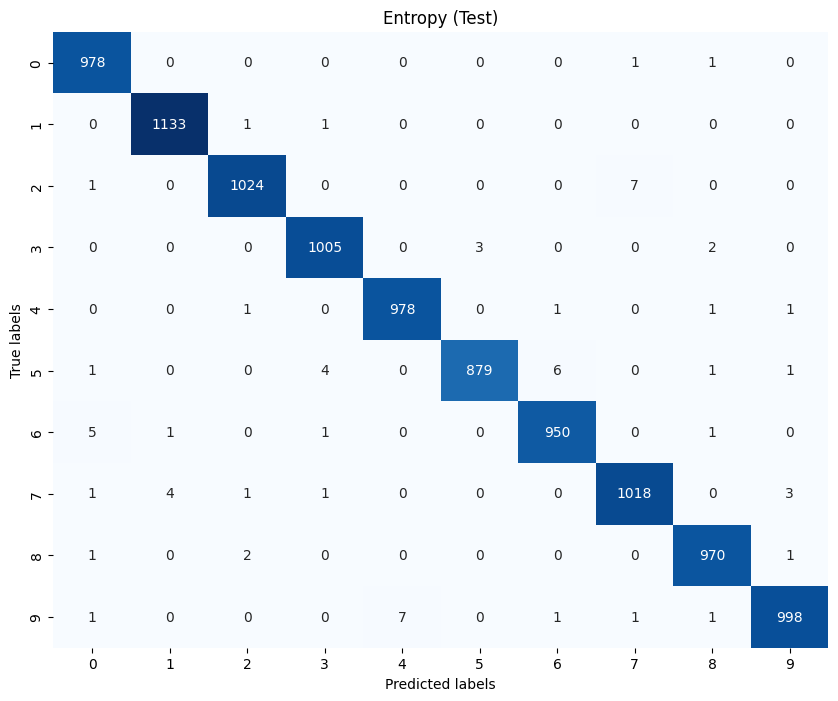

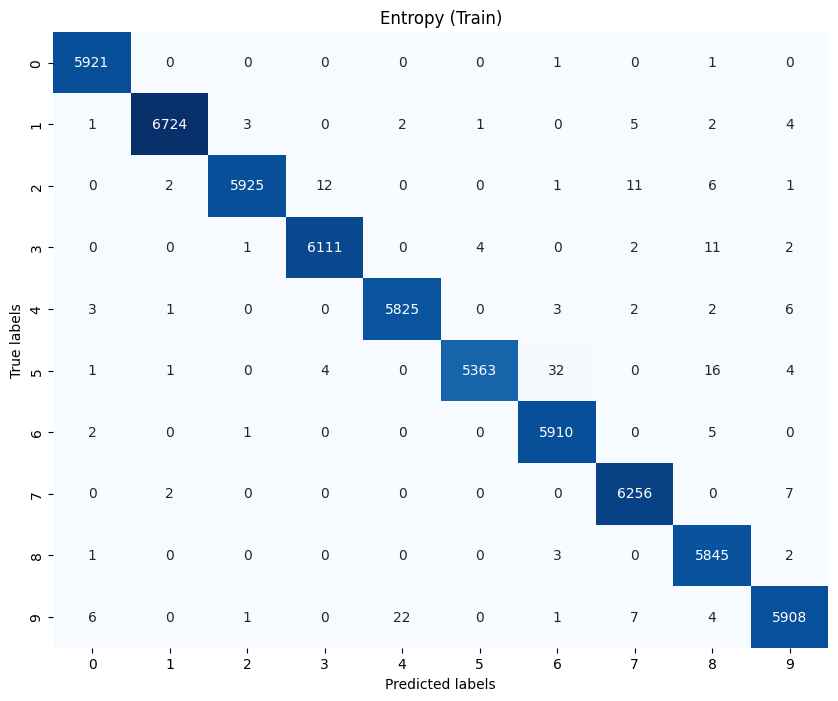

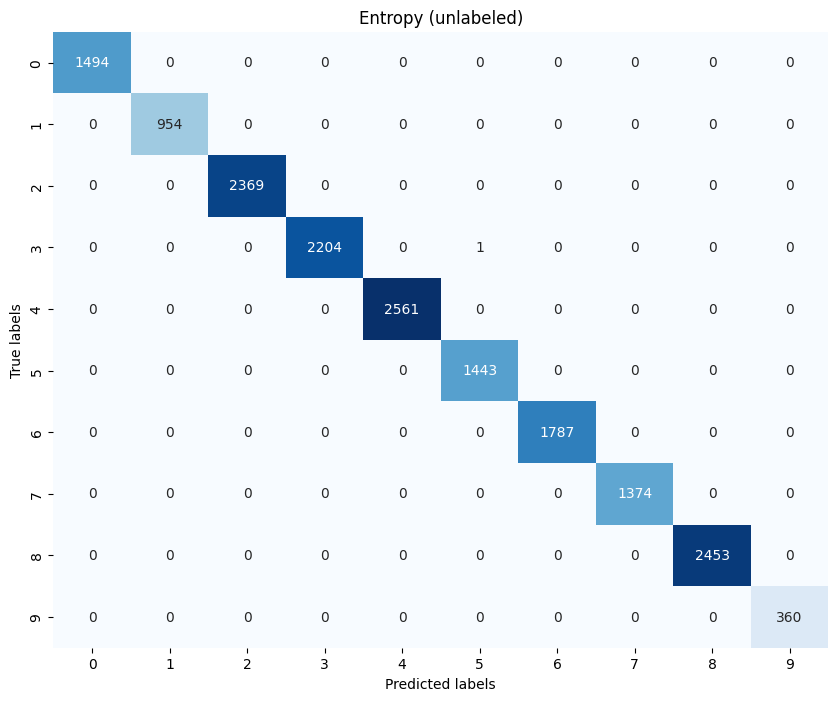

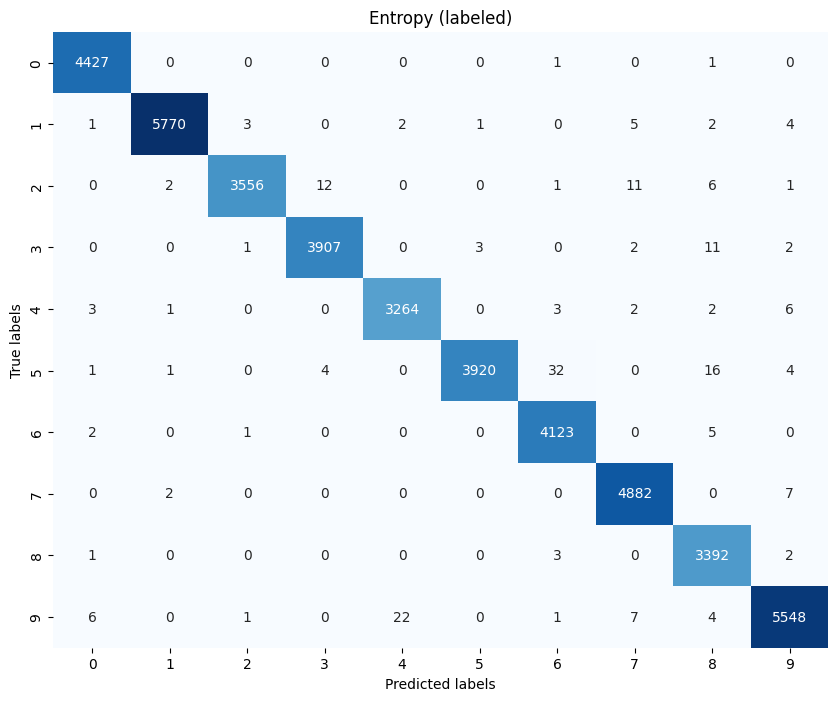

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Entropy (Test)')
plt.show()


conf_matrix = confusion_matrix(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Entropy (Train)')
plt.show()


conf_matrix = confusion_matrix(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Entropy (unlabeled)')
plt.show()


conf_matrix = confusion_matrix(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Entropy (labeled)')
plt.show()




In [38]:
from sklearn.metrics import classification_report

report1 = classification_report(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))
report2 = classification_report(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))
report3 = classification_report(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1))
report4 = classification_report(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1))

print(report1)
print(report2)
print(report3)
print(report4)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       1.00      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      1.00      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      0.99      1.00      5958
           3       1.00 

# **Density-Based Sampling**

In [42]:
from sklearn.neighbors import KernelDensity
from modAL.models import ActiveLearner
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Split the initial labeled dataset into labeled and unlabeled subsets
x_labeled, x_unlabeled, y_labeled, y_unlabeled = train_test_split(
    x_train, y_train, test_size=0.95, random_state=42)


from sklearn.decomposition import PCA

def density_based_sampling(classifier, X_pool, n_instances):
    pca = PCA(n_components=2) 
    X_pool_reduced = pca.fit_transform(X_pool.reshape(len(X_pool), -1))
    
    kde = KernelDensity(bandwidth=0.1, kernel='gaussian')
    kde.fit(X_pool_reduced)
    
    density_scores = kde.score_samples(X_pool_reduced)
    
    query_idx = np.argsort(density_scores)[-n_instances:]
    
    return query_idx, X_pool[query_idx]


learner = ActiveLearner(
    estimator=model, 
    X_training=x_labeled, 
    y_training=y_labeled, 
    query_strategy=density_based_sampling
)

n_queries = 10
n_samples_per_iteration = 4000

# Training loop
for i in range(n_queries):
    
    query_idx, query_sample = learner.query(x_unlabeled, n_instances=n_samples_per_iteration)
    
    queried_labels = y_unlabeled[query_idx]
    
    # Label the queried samples and update the labeled dataset
    x_labeled = np.concatenate([x_labeled, query_sample])
    y_labeled = np.concatenate([y_labeled, queried_labels])
    x_unlabeled = np.delete(x_unlabeled, query_idx, axis=0)
    y_unlabeled = np.delete(y_unlabeled, query_idx, axis=0)
    
    print("X_labeled " , x_labeled.shape)
    print("y_labeled " , y_labeled.shape)
    print("learner x_train " , learner.X_training.shape)
    print("learner y_train " , learner.y_training.shape)

    
    
    learner.teach(query_sample, queried_labels)
    
    # Evaluate the model's performance on the training set
    train_pred = learner.predict(x_train)
    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))
    train_precision = precision_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1), average='macro')
    train_recall = recall_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1), average='macro')
    train_f1 = f1_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1), average='macro')
    
    
     # Evaluate the model's performance on the unlabeled set
    unlabeled_pred = learner.predict(x_unlabeled)
    unlabeled_accuracy = accuracy_score(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1))
    unlabeled_precision = precision_score(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1), average='macro')
    unlabeled_recall = recall_score(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1), average='macro')
    unlabeled_f1 = f1_score(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1), average='macro')
    
    
     # Evaluate the model's performance on the labeled set
    labeled_pred = learner.predict(x_labeled)
    labeled_accuracy = accuracy_score(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1))
    labeled_precision = precision_score(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1), average='macro')
    labeled_recall = recall_score(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1), average='macro')
    labeled_f1 = f1_score(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1), average='macro')
    
    
    
    # Evaluate the model's performance on the test set
    test_pred = learner.predict(x_test)
    test_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))
    test_precision = precision_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), average='macro')
    test_recall = recall_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), average='macro')
    test_f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), average='macro')
    
    print(f"Iteration {i+1} - Train Accuracy: {train_accuracy:.4f}, Train Precision: {train_precision:.4f}, Train Recall: {train_recall:.4f}, Train F1: {train_f1:.4f}")
    print(f"Iteration {i+1} - Test Accuracy: {test_accuracy:.4f}, Test Precision: {test_precision:.4f}, Test Recall: {test_recall:.4f}, Test F1: {test_f1:.4f}")
    print(f"Iteration {i+1} - Labeled Accuracy: {labeled_accuracy:.4f}, Labeled Precision: {labeled_precision:.4f}, Labeled Recall: {labeled_recall:.4f}, Labeled F1: {labeled_f1:.4f}")
    print(f"Iteration {i+1} - unlabeled Accuracy: {unlabeled_accuracy:.4f}, unlabeled Precision: {unlabeled_precision:.4f}, unlabeled Recall: {unlabeled_recall:.4f}, unlabeled F1: {unlabeled_f1:.4f}")


24/94 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5099 - loss: 1.8206

W0000 00:00:1714157769.222064     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.7362 - loss: 0.9432


W0000 00:00:1714157773.896830     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


X_labeled  (7000, 28, 28)
y_labeled  (7000, 10)
learner x_train  (3000, 28, 28)
learner y_train  (3000, 10)
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9647 - loss: 0.1243
  88/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step 

W0000 00:00:1714157927.126174     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1657/1657 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


W0000 00:00:1714157934.949106     128 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 59/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


W0000 00:00:1714157936.380562     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Iteration 1 - Train Accuracy: 0.1124, Train Precision: 0.0112, Train Recall: 0.1000, Train F1: 0.0202
Iteration 1 - Test Accuracy: 0.1135, Test Precision: 0.0114, Test Recall: 0.1000, Test F1: 0.0204
Iteration 1 - Labeled Accuracy: 0.4171, Labeled Precision: 0.0417, Labeled Recall: 0.1000, Labeled F1: 0.0589
Iteration 1 - unlabeled Accuracy: 0.0721, unlabeled Precision: 0.0072, unlabeled Recall: 0.1000, unlabeled F1: 0.0135


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


X_labeled  (11000, 28, 28)
y_labeled  (11000, 10)
learner x_train  (7000, 28, 28)
learner y_train  (7000, 10)
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9734 - loss: 0.0867
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Iteration 2 - Train Accuracy: 0.9567, Train Precision: 0.9595, Train Recall: 0.9561, Train F1: 0.9561
Iteration 2 - Test Accuracy: 0.9576, Test Precision: 0.9601, Test Recall: 0.9570, Test F1: 0.9568
Iteration 2 - Labeled Accuracy: 0.9740, Labeled Precision: 0.9696, Labeled Recall: 0.9659, Labeled F1: 0.9668
Iteration 2 - unlabeled Accuracy: 0.9528, unlabeled Precision: 0.9519, unlabeled Recall: 0.9538, unlabeled F1: 0.9506
X_labeled  (15000, 28, 28)
y_labeled  (15000, 10)
learner x_train  (11000, 28, 28)
learner y_train  (11000, 10)
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9789 - loss: 0.0690
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3

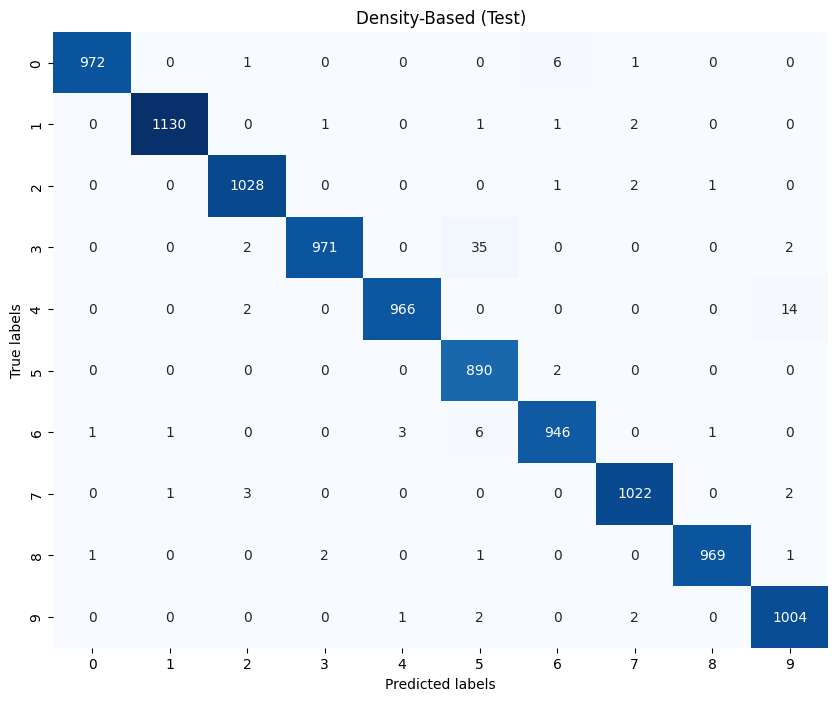

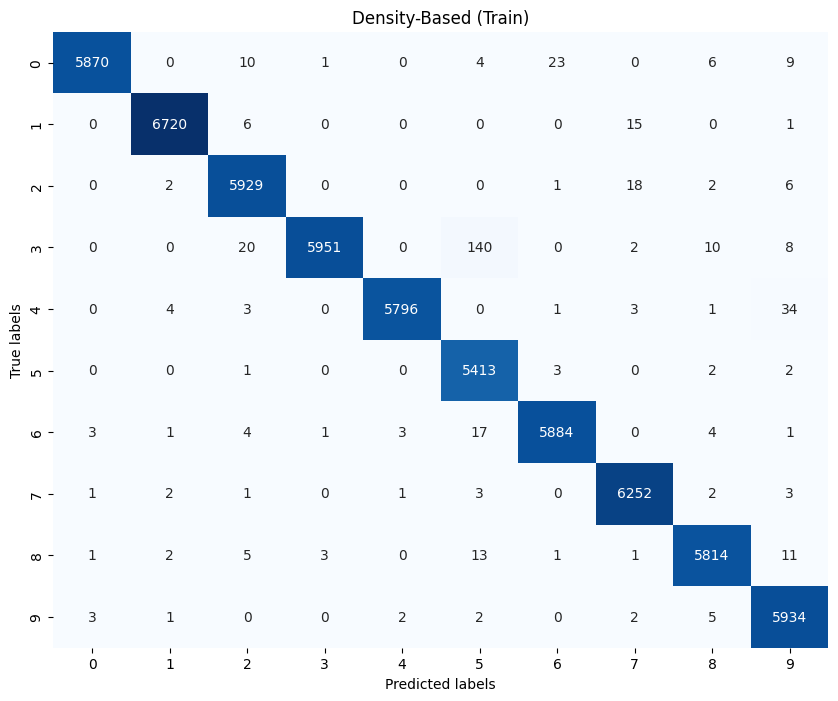

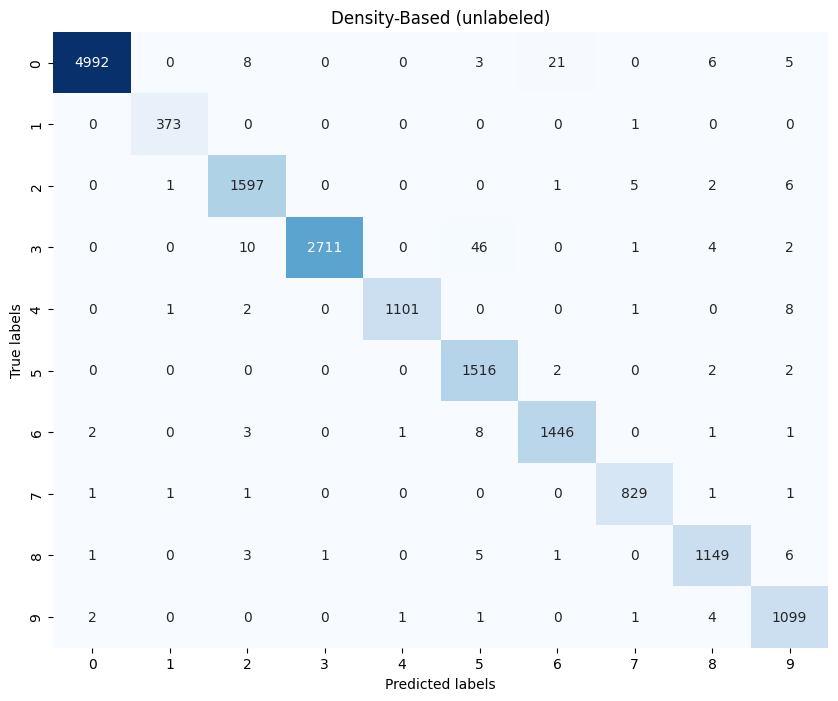

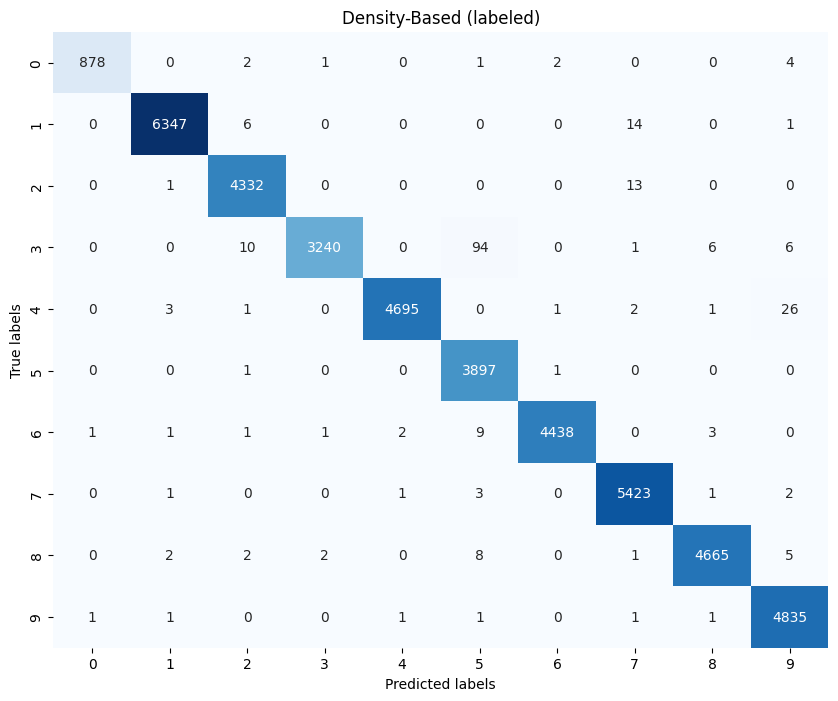

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Density-Based (Test)')
plt.show()


conf_matrix = confusion_matrix(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Density-Based (Train)')
plt.show()


conf_matrix = confusion_matrix(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Density-Based (unlabeled)')
plt.show()


conf_matrix = confusion_matrix(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Density-Based (labeled)')
plt.show()




In [46]:
from sklearn.metrics import classification_report

report1 = classification_report(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))
report2 = classification_report(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))
report3 = classification_report(np.argmax(y_unlabeled, axis=1), np.argmax(unlabeled_pred, axis=1))
report4 = classification_report(np.argmax(y_labeled, axis=1), np.argmax(labeled_pred, axis=1))

print(report1)
print(report2)
print(report3)
print(report4)


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       1.00      0.96      0.98      1010
           4       1.00      0.98      0.99       982
           5       0.95      1.00      0.97       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.98      1.00      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5923
           1       1.00      1.00      1.00      6742
           2       0.99      1.00      0.99      5958
           3       1.00 